# Titanic 데이터 EDA

## 1.데이터 확인

### 데이터 불러오기 및 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('titanic_train.csv')

### 데이터프레임 확인

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [36]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## 2. 데이터 정제

### 결측치 처리

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

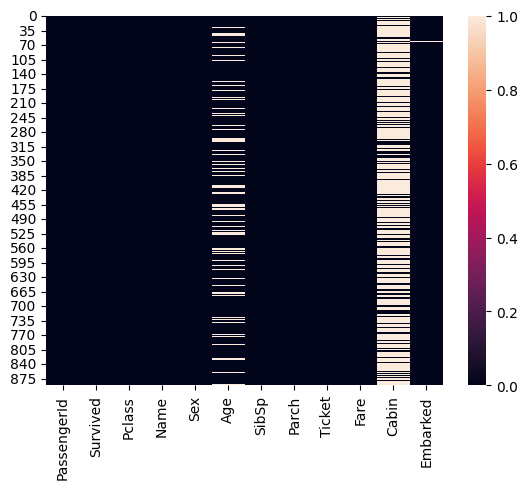

In [38]:
sns.heatmap(df.isnull())

### MissingNo

#### Ages 결측치 채우기

<Axes: xlabel='Age', ylabel='Count'>

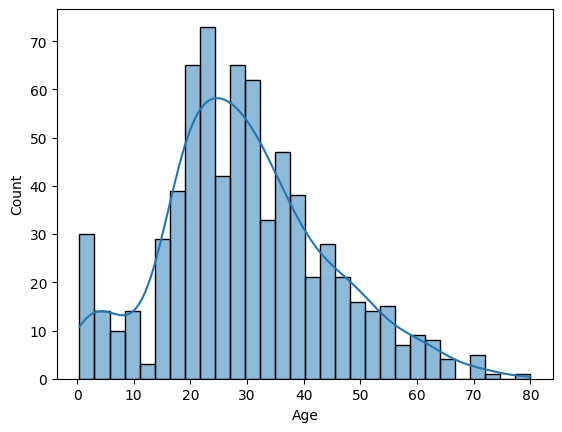

In [39]:
sns.histplot(df['Age'], bins=30, kde=True)

In [40]:
df['Age'].median()

28.0

In [41]:
# 나이 결측치 평균으로 대체

df['Age'].fillna(df['Age'].mean(), inplace=True)

/var/folders/s2/kqf29pt97w527q67cq0htzc80000gn/T/ipykernel_35088/3947887009.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [42]:
df['Age'].isnull().sum()

0

#### Embarked 결측치 처리

In [43]:
df['Embarked'].fillna(df['Embarked'][0], inplace=True)

/var/folders/s2/kqf29pt97w527q67cq0htzc80000gn/T/ipykernel_35088/3980931849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'][0], inplace=True)


In [44]:
df['Embarked'].isnull().sum()

0

#### Cabin 결측치 처리

In [45]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 중복값 처리

In [46]:
df.duplicated().sum()

0

In [47]:
# 중복값 제거
# df.drop_duplicates(inplace=True)

### 데이터 타입 통일

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [49]:
df['Age'] = df['Age'].astype(int)

In [51]:
df['Sex'] = df['Sex'].map({'male':0,
						   'female':1})

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S


### Embarked 컬럼 수치 변환

In [53]:
df['Embarked'] = df['Embarked'].map({'S':0,
									 'C':1,
									 'Q':2})

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0


## 3. 단일변수 기술 통계량 확인

### 요약통계

In [55]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.544332,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### 범주형 데이터
#### 사망여부

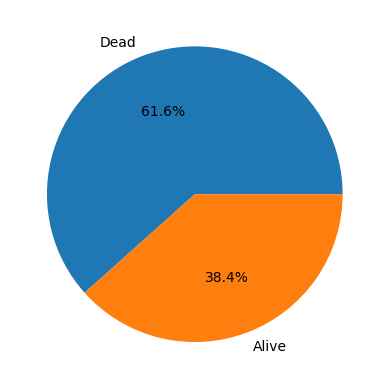

In [69]:
plt.pie(df['Survived'].value_counts(), labels=['Dead','Alive'], autopct='%1.1f%%')

plt.show()

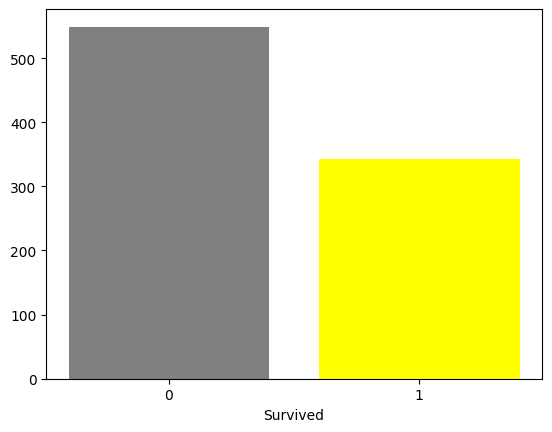

In [75]:
plt.bar(df['Survived'].value_counts().index, df['Survived'].value_counts(), color=['grey','yellow'])
plt.xlabel('Survived')
plt.xticks([0, 1])

plt.show()

#### 객실 등급

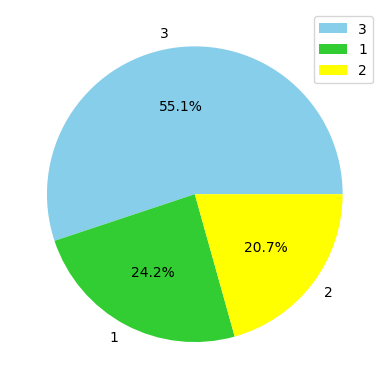

In [89]:
plt.pie(df['Pclass'].value_counts(), labels=df['Pclass'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'limegreen', 'yellow'])

plt.legend()
plt.show()

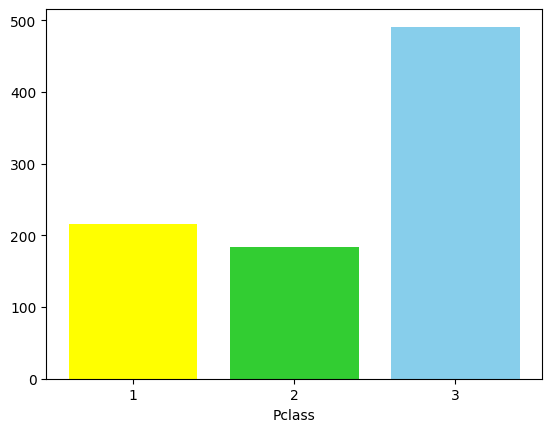

In [91]:
plt.bar(df['Pclass'].value_counts().index, df['Pclass'].value_counts(), color=['skyblue','yellow','limegreen'])
plt.xlabel('Pclass')
plt.xticks(df['Pclass'].value_counts().index)

plt.show()

#### 성별

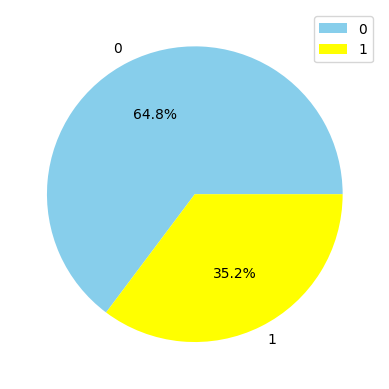

In [92]:
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'yellow'])

plt.legend()
plt.show()

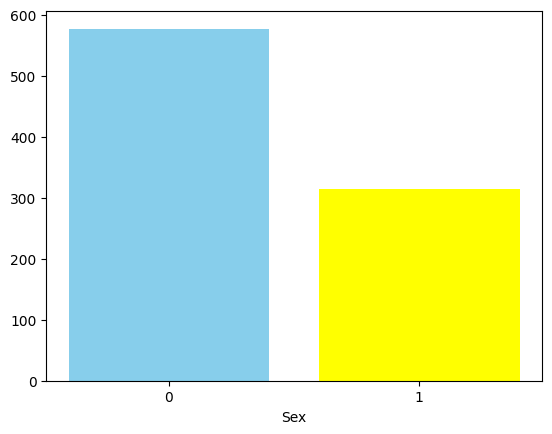

In [93]:
plt.bar(df['Sex'].value_counts().index, df['Sex'].value_counts(), color=['skyblue','yellow'])
plt.xlabel('Sex')
plt.xticks(df['Sex'].value_counts().index)

plt.show()

#### 승선지

### 수치형 데이터

#### 연령

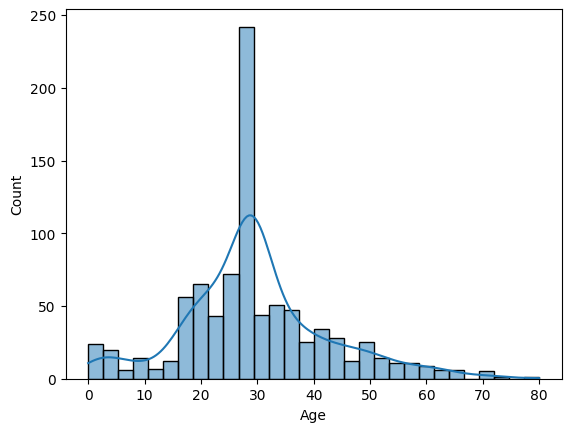

In [96]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.show()

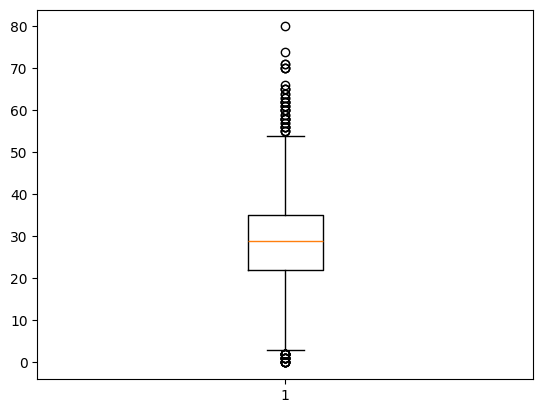

In [98]:
plt.boxplot(df['Age'])
plt.show()

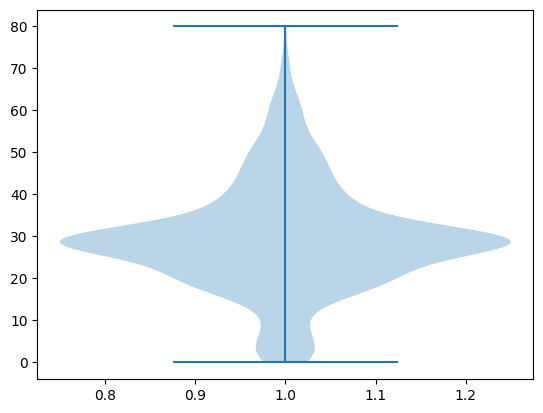

In [100]:
plt.violinplot(df['Age'])
plt.show()

### SibSp
SibSp: 동승한 형제자매(Siblings)와 배우자(Spouse)의 합계

Text(0.5, 0, 'Number of SibSp')

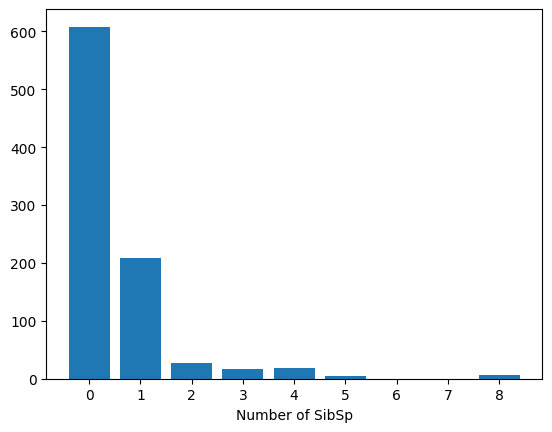

In [117]:
plt.bar(x=df['SibSp'].value_counts().index,
		height=df['SibSp'].value_counts())

plt.xticks(np.arange(0, df['SibSp'].value_counts().index.max()+1))
plt.xlabel('Number of SibSp')

### Parch
Parch: 동승한 부모(Parent)와 자녀(Children)의 수

Text(0.5, 0, 'Number of Parch')

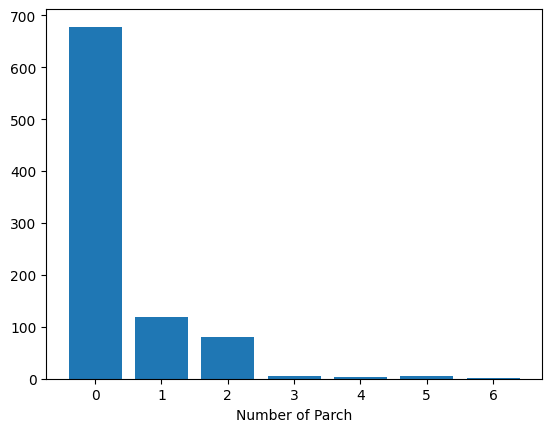

In [116]:
plt.bar(x=df['Parch'].value_counts().index,
		height=df['Parch'].value_counts())

plt.xticks(np.arange(0, df['Parch'].value_counts().index.max()+1))
plt.xlabel('Number of Parch')

### 승선티켓 요금

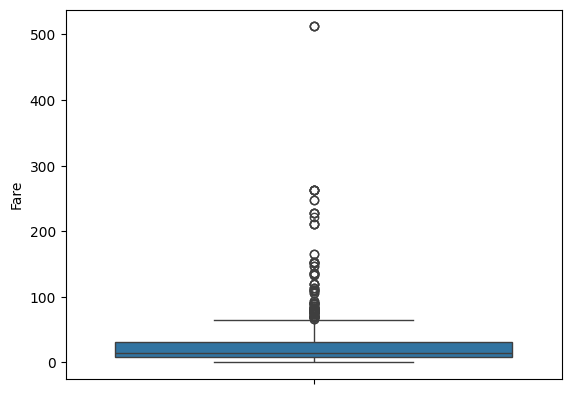

In [110]:
sns.boxplot(df['Fare'])
plt.show()

## 4. 다중변수 통계량 확인

### 성별 - 생존률

In [113]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    0           468
     1           109
1    0            81
     1           233
Name: Survived, dtype: int64

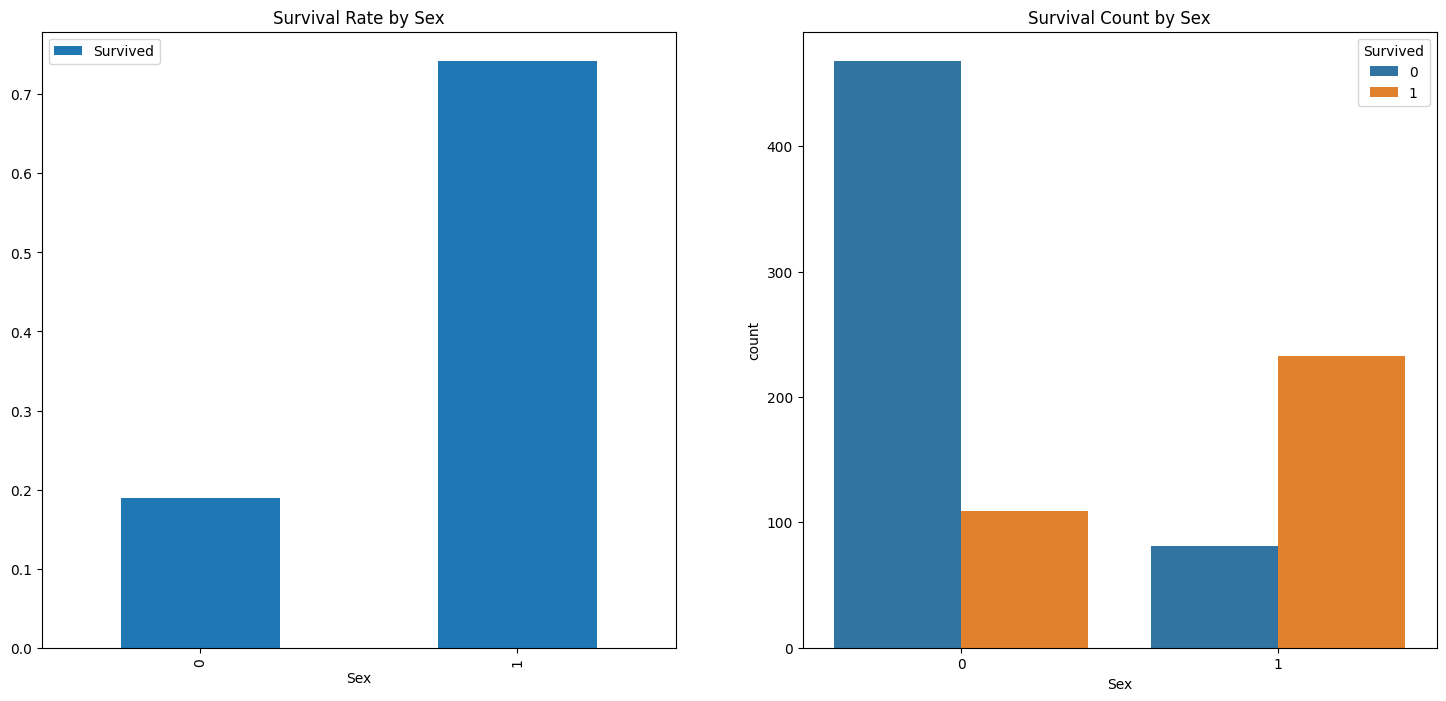

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival Rate by Sex')

sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Survival Count by Sex')

plt.show()



### 객실 등급 - 생존률

### 연령 - 생존률

### 승선지 - 사망률

### SibSp, Parch - 생존률

### 티켓 요금 - 객실 등급

### 상관관계

## 5. Feature engineering

### Ageband

### Family size

### Alone